# Library Import and Understand Data

In [1]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn
import ipywidgets as widgets


In [2]:
df = pd.read_csv('heart.csv') # Reading the file .csv
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Firstly, we need to know the number of patient suffering Heart Disease (column: **target**)

In [4]:
positive_count = len(df[df['target']==1])
total_count = len(df)
print("{0} of {1} people are suffering Heart Disease".format(positive_count, total_count))
print(f"positive rate is {positive_count/total_count*100:.2f}%")

165 of 303 people are suffering Heart Disease
positive rate is 54.46%


## Positive rate is 54.46%, so this is a nearly balanced data

# Data Visualization


In [5]:
# Calculate the correlation coefficients in pairs
# Find out whether there is a hint relationship
df_corr = df.corr()

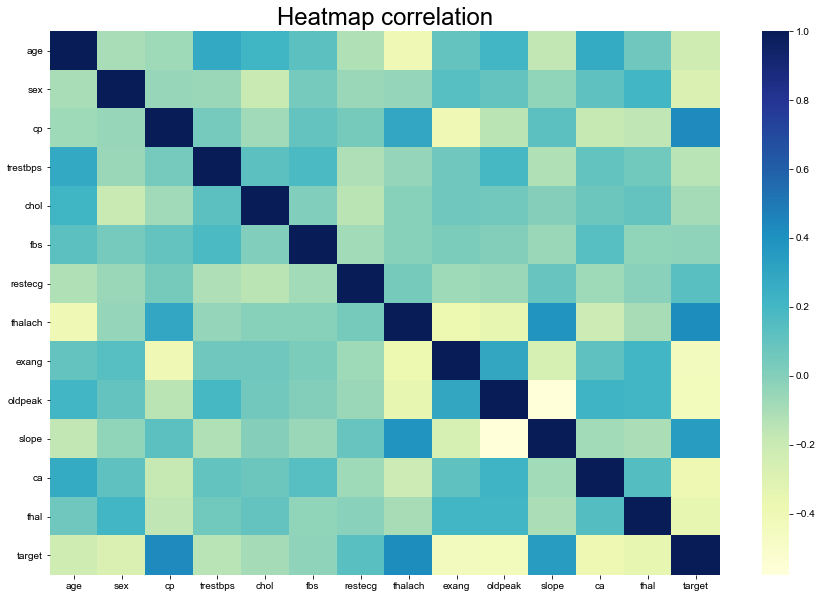

In [6]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can see, some pairs have relationships but not significant

No handles with labels found to put in legend.


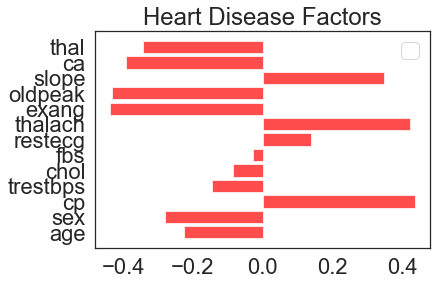

In [7]:
import numpy as np
import matplotlib.pyplot as plot

plot.barh(width = df_corr['target'][:-1], 
                    y = df.columns[:-1],
                    color = 'red',
                    alpha=0.7)

plot.title('Heart Disease Factors')
plot.legend()

plot.show()

# Data Selection and Processing

In [8]:
pd.isna(df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Congratulation! There is no NA cell.

In [9]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection

Now, we can try to use SVM model classifier, and see the difference between kernels

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [11]:
# Visualization Function
def classifier_visualize(classifier, X, y, column_1, column_2):
    ''' 
    Plot the classifier result 
    Mark all False a red frame
    '''
    y_pridicted = classifier.predict(X)

    TP = X[(y_pridicted == 1) & (y_pridicted == y)]
    FP = X[(y_pridicted == 1) & (y_pridicted != y)]

    TN = X[(y_pridicted == 0) & (y_pridicted == y)]
    FN = X[(y_pridicted == 0) & (y_pridicted != y)]
    f = plt.figure(figsize=(12,12))

    sub_plot = f.add_subplot(111)
    sub_plot.scatter(TP[column_1], TP[column_2], c ="cyan",  
            linewidths = 2,  
            marker ="s",  
            label = "True Positive",
            s = 50)
    sub_plot.scatter(FP[column_1], FP[column_2], c ="cyan",  
            linewidths = 2,  
            marker ="s", 
            edgecolor = 'red',
            label = "False Positive",
            s = 50)

    sub_plot.scatter(TN[column_1], TN[column_2], c ="green",  
            linewidths = 2,  
            marker ="^",  
            label = "True Negative",
            s = 50)
    sub_plot.scatter(FN[column_1], FN[column_2], c ="green",  
            linewidths = 2,  
            marker ="^",  
            edgecolor = 'red',
            label = "False Negative",
            s = 50)
    sub_plot.legend()
    sub_plot.set_xlabel(column_1) 
    sub_plot.set_ylabel(column_2) 
    sub_plot.set_title(f"{column_1} and {column_2} distribution") 
    return sub_plot
column_1 = widgets.Select(
    value='trestbps',
    placeholder='Choose a Column',
    options=list(df.columns[:-1]),
    description='Column 1:',
    ensure_option=True,
    disabled=False
)
column_2 = widgets.Select(
    value = 'chol',
    placeholder='Choose a Column',
    options=list(df.columns[:-1]),
    description='Column 2:',
    ensure_option=True,
    disabled=False
)


## linear kernel

In [12]:
linear_classifier = svm.SVC(kernel='linear')
linear_classifier = linear_classifier.fit(X_train, y_train)

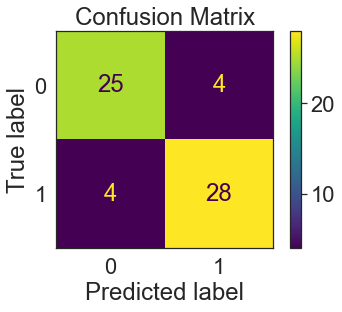

In [13]:
prediction_SVM_linear = linear_classifier.predict(X_test)
# print(confusion_matrix(y_test, prediction_SVM_linear))
plot_confusion_matrix(linear_classifier, X_test, y_test)

plot.title('Confusion Matrix')
plot.show()

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

linear_SVM_f1 = f1_score(y_test, prediction_SVM_linear)
linear_SVM_accuracy = accuracy_score(y_test, prediction_SVM_linear)

print(f"linear SVM f1_score is {linear_SVM_f1}")
print(f"linear SVM accuracy_score is {linear_SVM_accuracy}")

linear SVM f1_score is 0.875
linear SVM accuracy_score is 0.8688524590163934


In [15]:
display(column_1, column_2)
print('#select columns and run the below cell')


Select(description='Column 1:', index=3, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

Select(description='Column 2:', index=4, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

#select columns and run the below cell


<AxesSubplot:title={'center':'trestbps and chol distribution'}, xlabel='trestbps', ylabel='chol'>

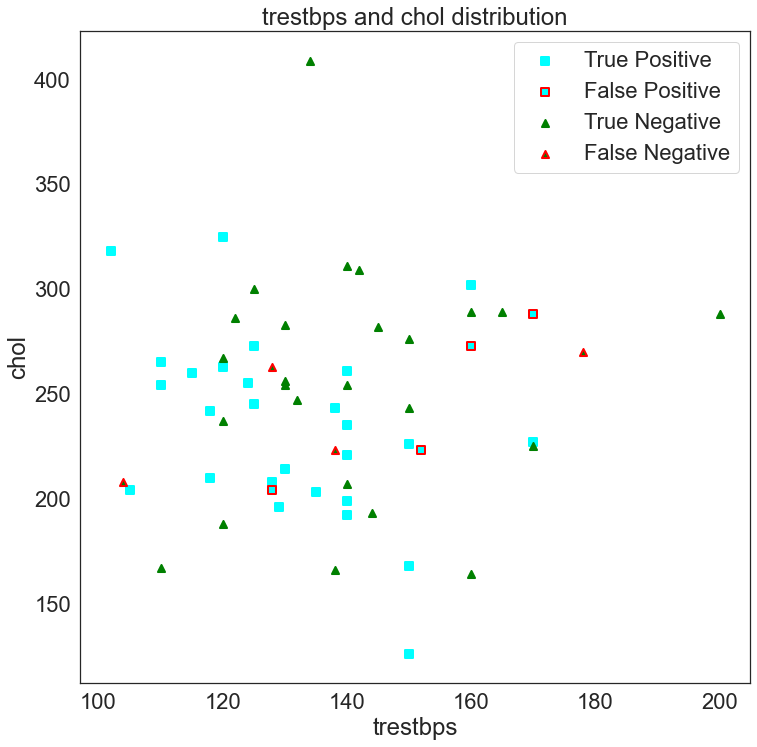

In [16]:
display(classifier_visualize(linear_classifier, X_test, y_test, column_1.value, column_2.value))


## poly kernel

In [17]:
poly_classifier = svm.SVC(kernel='poly')
poly_classifier.fit(X_train, y_train)

SVC(kernel='poly')

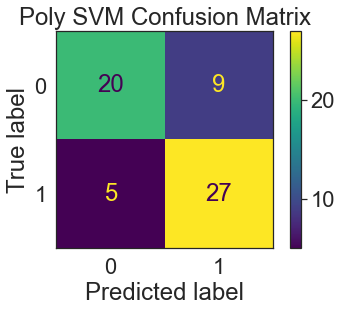

In [18]:
prediction_SVM_poly = poly_classifier.predict(X_test)
# print(confusion_matrix(y_test, prediction_SVM_linear))
plot_confusion_matrix(poly_classifier, X_test, y_test)

plot.title('Poly SVM Confusion Matrix')
plot.show()

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

poly_SVM_f1 = f1_score(y_test, prediction_SVM_poly)
poly_SVM_accuracy = accuracy_score(y_test, prediction_SVM_poly)

print(f"linear SVM f1_score is {poly_SVM_f1}")
print(f"linear SVM accuracy_score is {poly_SVM_accuracy}")

linear SVM f1_score is 0.7941176470588235
linear SVM accuracy_score is 0.7704918032786885


In [20]:
display(column_1, column_2)
print('#select columns and run the below cell')

Select(description='Column 1:', index=3, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

Select(description='Column 2:', index=4, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

#select columns and run the below cell


<AxesSubplot:title={'center':'trestbps and chol distribution'}, xlabel='trestbps', ylabel='chol'>

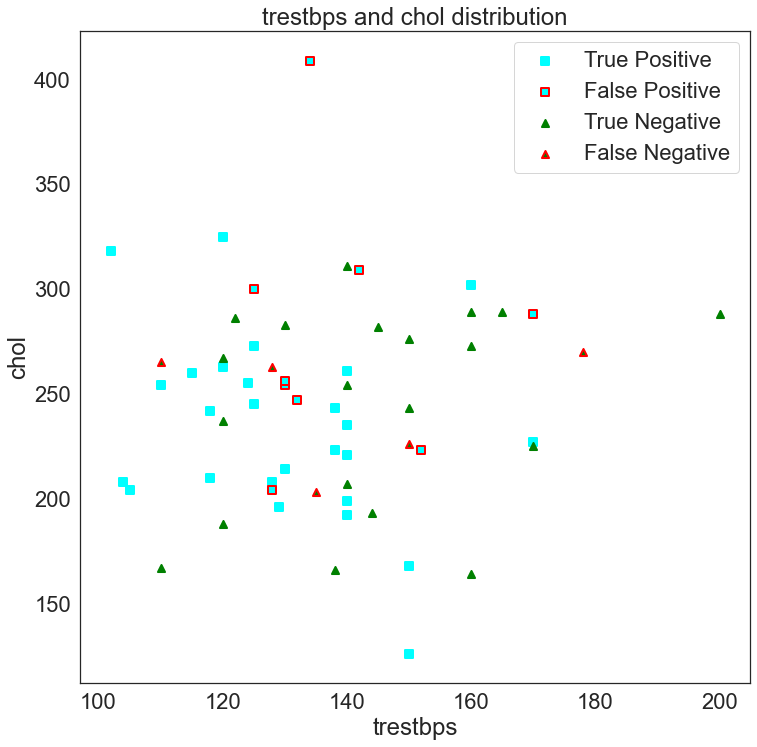

In [21]:
display(classifier_visualize(poly_classifier, X_test, y_test, column_1.value, column_2.value))


# Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

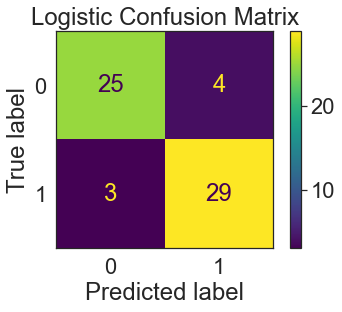

In [23]:
plot_confusion_matrix(logistic_classifier, X_test, y_test)

plot.title('Logistic Confusion Matrix')
plot.show()

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

prediction_logistic = logistic_classifier.predict(X_test)

logistic_f1 = f1_score(y_test, prediction_logistic)
logistic_accuracy = accuracy_score(y_test, prediction_logistic)

print(f"Logistic regression f1_score is {logistic_f1}")
print(f"Logistic regression accuracy_score is {logistic_accuracy}")

Logistic regression f1_score is 0.8923076923076922
Logistic regression accuracy_score is 0.8852459016393442


In [25]:
display(column_1, column_2)
print('#select columns and run the below cell')

Select(description='Column 1:', index=3, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

Select(description='Column 2:', index=4, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

#select columns and run the below cell


<AxesSubplot:title={'center':'trestbps and chol distribution'}, xlabel='trestbps', ylabel='chol'>

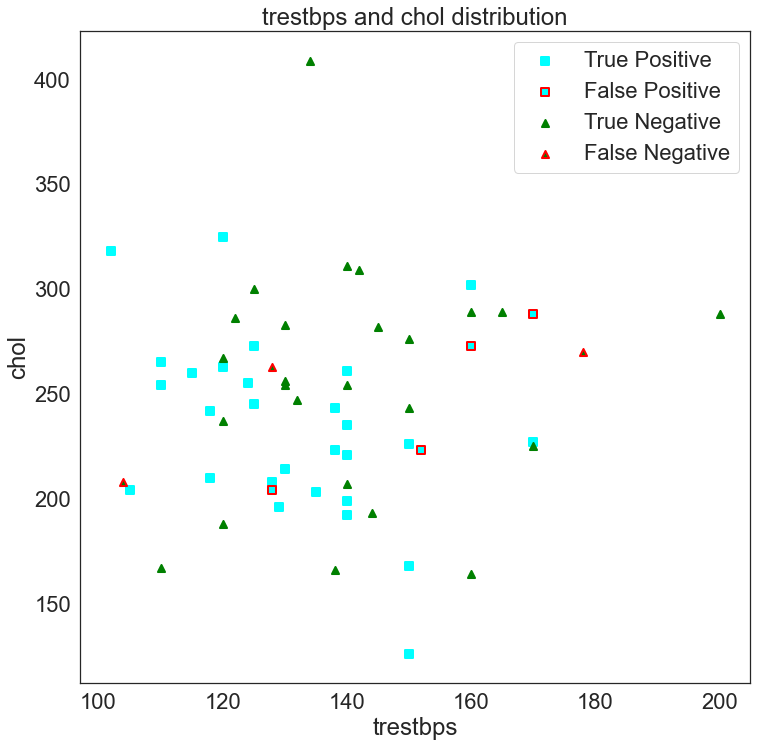

In [26]:
display(classifier_visualize(logistic_classifier, X_test, y_test, column_1.value, column_2.value))


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

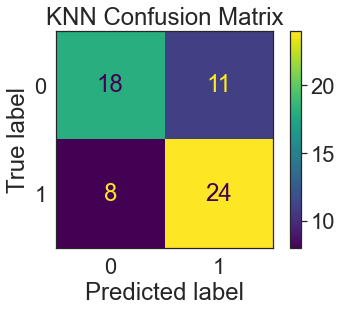

In [28]:
plot_confusion_matrix(knn_classifier, X_test, y_test)

plot.title('KNN Confusion Matrix')
plot.show()

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

prediction_knn = knn_classifier.predict(X_test)

knn_f1 = f1_score(y_test, prediction_knn)
knn_accuracy = accuracy_score(y_test, prediction_knn)
print(f"knn f1_score is {knn_f1}")
print(f"knn accuracy_score is {knn_accuracy}")

knn f1_score is 0.7164179104477612
knn accuracy_score is 0.6885245901639344


In [30]:
display(column_1, column_2)
print('#select columns and run the below cell')

Select(description='Column 1:', index=3, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

Select(description='Column 2:', index=4, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

#select columns and run the below cell


<AxesSubplot:title={'center':'trestbps and chol distribution'}, xlabel='trestbps', ylabel='chol'>

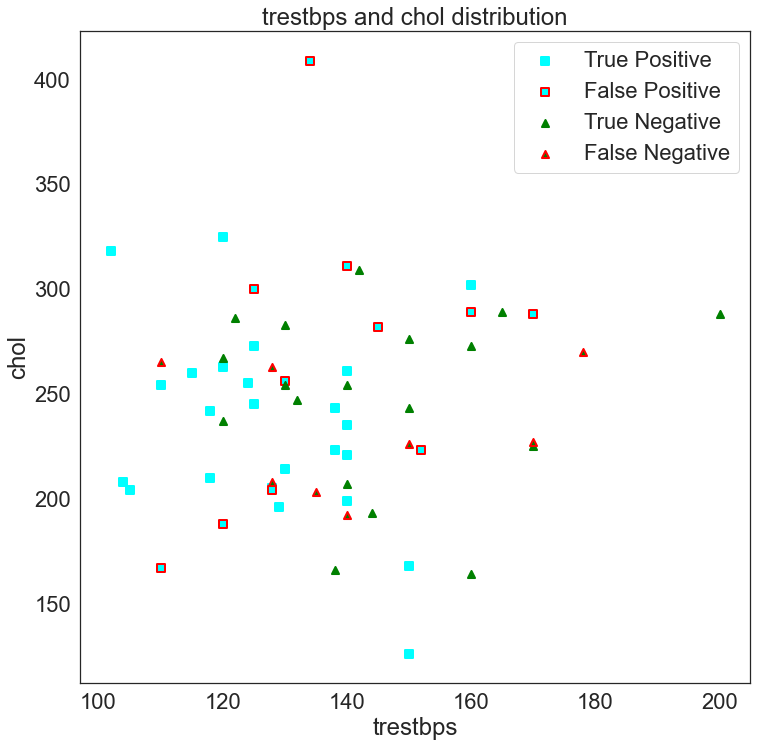

In [31]:
display(classifier_visualize(knn_classifier, X_test, y_test, column_1.value, column_2.value))


# Compare different SVM models

<AxesSubplot:ylabel='Classifier'>

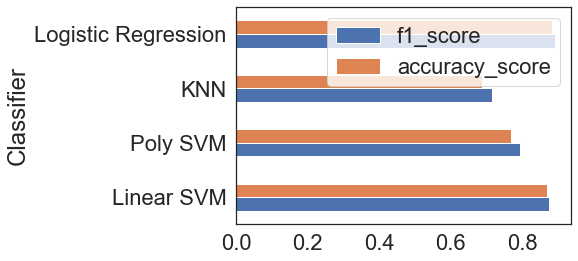

In [32]:
# Visualization Function
classifiers = [linear_classifier, poly_classifier, knn_classifier, logistic_classifier]
classifier_names = ["Linear SVM", "Poly SVM", "KNN", "Logistic Regression"]
f1_scores = [linear_SVM_f1, poly_SVM_f1, knn_f1, logistic_f1]
accuracy_scores = [linear_SVM_accuracy, poly_SVM_accuracy, knn_accuracy, logistic_accuracy]
accuracy_df = pd.DataFrame({"Classifier":classifier_names, "f1_score":f1_scores, "accuracy_score":accuracy_scores})

accuracy_df.plot.barh(x="Classifier")

In [33]:
def classifier_compare_visualize(X, y, column_1, column_2):
    ''' 
    Plot the classifier result 
    Mark all False a red frame
    '''
    f = plt.figure(figsize=(20,20))
    for index, classifier in enumerate(classifiers):
        y_pridicted = classifier.predict(X)

        TP = X[(y_pridicted == 1) & (y_pridicted == y)]
        FP = X[(y_pridicted == 1) & (y_pridicted != y)]

        TN = X[(y_pridicted == 0) & (y_pridicted == y)]
        FN = X[(y_pridicted == 0) & (y_pridicted != y)]

        sub_plot = f.add_subplot(2, 2, index+1)
        sub_plot.scatter(TP[column_1], TP[column_2], c ="cyan",  
                linewidths = 2,  
                marker ="s",  
                label = "True Positive",
                s = 50)
        sub_plot.scatter(FP[column_1], FP[column_2], c ="cyan",  
                linewidths = 2,  
                marker ="s", 
                edgecolor = 'red',
                label = "False Positive",
                s = 50)

        sub_plot.scatter(TN[column_1], TN[column_2], c ="green",  
                linewidths = 2,  
                marker ="^",  
                label = "True Negative",
                s = 50)
        sub_plot.scatter(FN[column_1], FN[column_2], c ="green",  
                linewidths = 2,  
                marker ="^",  
                edgecolor = 'red',
                label = "False Negative",
                s = 50)
        sub_plot.set_title(classifier_names[index])
        sub_plot.legend()
        sub_plot.set_xlabel(column_1) 
        sub_plot.set_ylabel(column_2) 
    return sub_plot

In [34]:
display(column_1, column_2)
print('#select columns and run the below cell')

Select(description='Column 1:', index=3, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

Select(description='Column 2:', index=4, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 't…

#select columns and run the below cell


<AxesSubplot:title={'center':'Logistic Regression'}, xlabel='trestbps', ylabel='chol'>

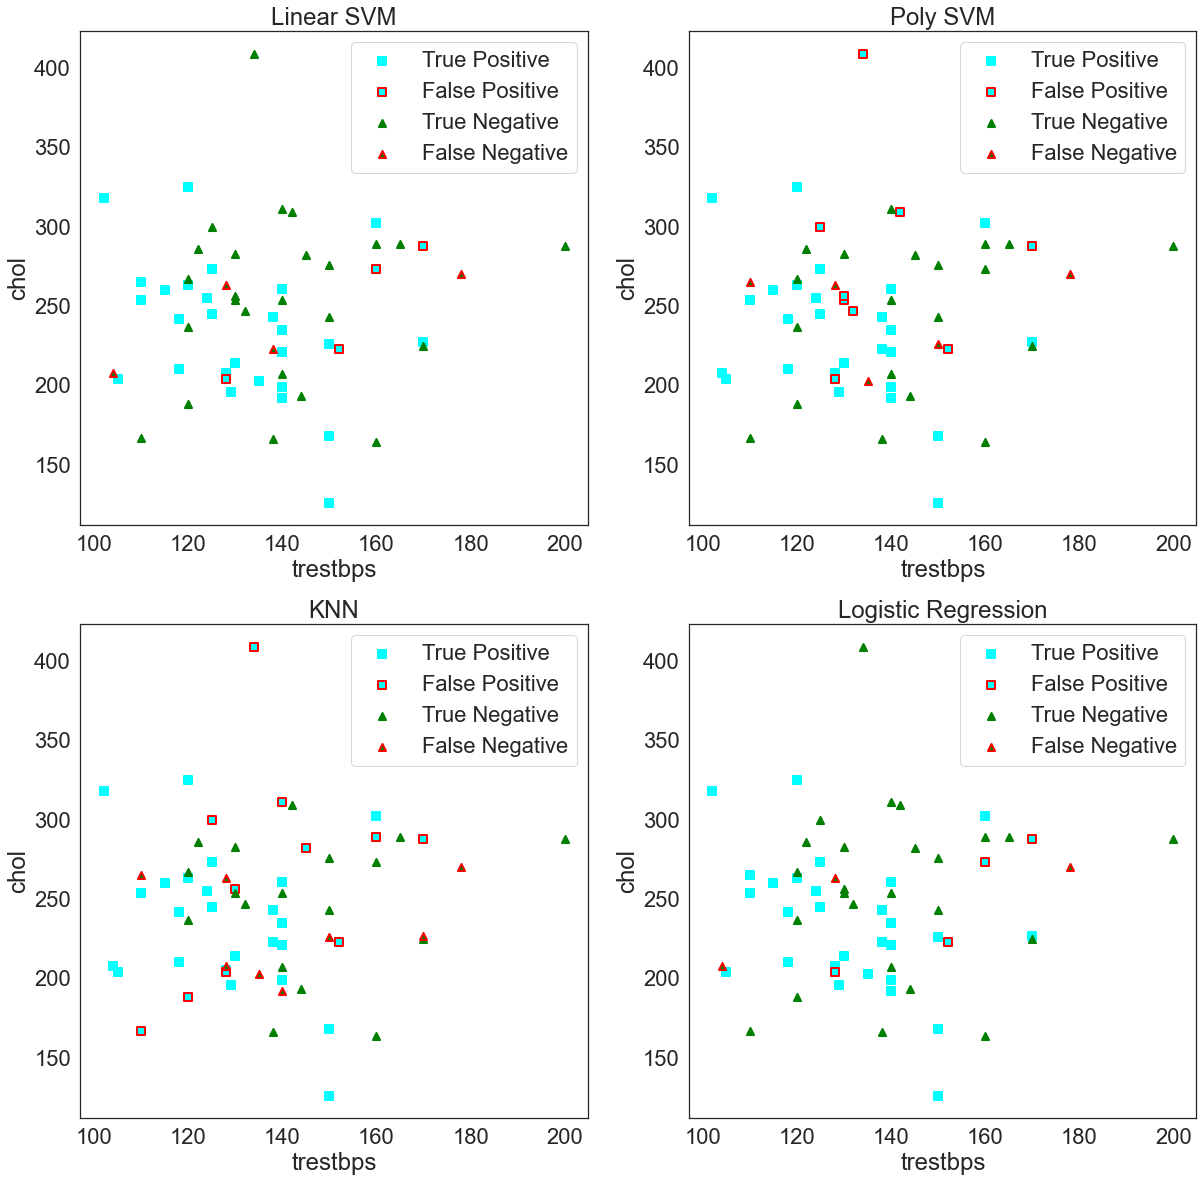

In [35]:
display(classifier_compare_visualize(X_test, y_test, column_1.value, column_2.value))
